In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

from dense_image_aligment import show_data, image_aligment_method, read_as_grayscale
from dense_image_aligment import save_aligment_progress, read_as_colored, show_data
from dense_image_aligment.transformations import TranslationTransformation

In [15]:
def create_simple_gauss(mu, sigma, shape):
    x = np.linspace(0, 1, shape[0])
    y = np.linspace(0, 1, shape[1])
    
    xx, yy = np.meshgrid(x, y, indexing='xy')
    
    z = np.exp(-( (xx - mu[0])**2 / (sigma[0]**2) +  (yy - mu[1])**2 / (sigma[1]**2)) / 2) / (np.sqrt(sigma[0]**2 + sigma[1]**2) * np.sqrt(2 * np.pi))
    return z

In [22]:
template = create_simple_gauss([0.5, 0.5], [0.1, 0.1], [100, 100])
image = create_simple_gauss([0.5, 0.5], [0.1, 0.1], [100, 100])

In [23]:
method, params = image_aligment_method(key='forward_additive')
params['alpha'] = 1.0
params['max_iterations'] = 100
params['p_init'] = np.array([30., 20.])
params['convergence_threshold'] = 1e-8

transform = TranslationTransformation(params['p_init'])

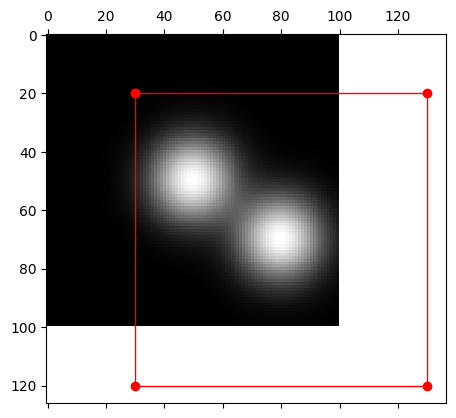

In [24]:
show_data(
    image=image, 
    template=template, 
    coords_transform=transform
)

In [25]:
ps = method(
    image=image,
    template=template,
    coord_transform=transform,
    **params
)

iteration: 58, |∇p|=0.00000:  58%|█████▊    | 58/100 [00:05<00:03, 11.31it/s]

Converged


In [26]:
ps[-1]

array([6.14435105e-07, 9.50562330e-07])

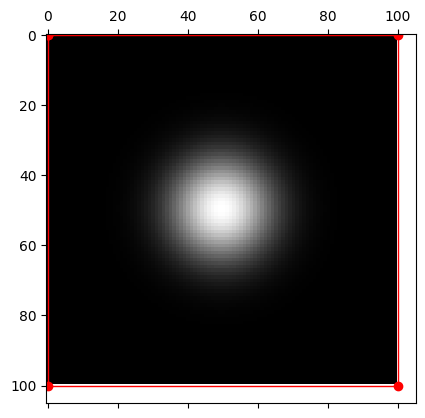

In [27]:
transform.p = ps[-1]

show_data(
    image=image, 
    template=template, 
    coords_transform=transform
)

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:07<00:00,  7.67it/s]


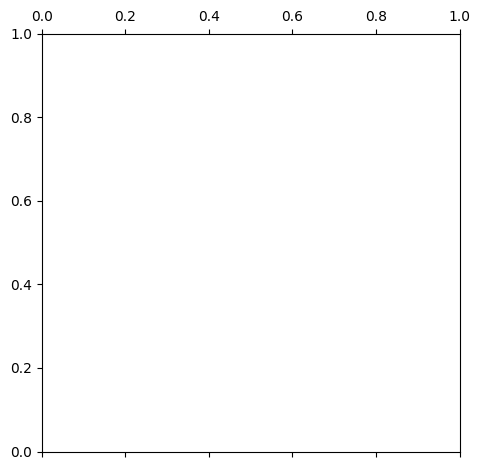

In [29]:
save_aligment_progress(
    f'./docs/images/translation_alignment_example.gif',
    image=image,
    template=template,
    coords_transform=transform,
    ps=ps,
    duration=100,
)